# <font color='blue'>Data Science Academy Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 6</font>

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1. da Linguagem Python em 13/06/2017 ******

## Estudo de Caso 1 - Classificação

Neste estudo de caso veremos como funciona a construção de um modelo preditivo do início ao fim. Resolveremos o problema de negócio usando técnicas de classificação.

Definição do problema: Construir um modelo para prever através dos dados retornados por um sonar, se o objeto é metal ou rocha. Cada padrão possui 60 números no range de 0 a 1 e cada número representa a energia na partícula de frequência retornada pelo sonar, durante um período de tempo. Os labels associados são R (para rocha ou rock em inglês) e M (para metal).

Atributos:

Este dataset não possui documentação sobre os atributos (o que traz desafio adicional no processo de análise). Mais informações sobre o dataset podem ser obtidas aqui: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks) e aqui: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.names

## Importando os Módulos

In [63]:
import sklearn.preprocessing as preprocessing
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandas import DataFrame
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

## Carregando os Dados

In [3]:
# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/sonar.csv"
dados = read_csv(url, header = None)

## Sumarizando os Dados

In [4]:
# Estatística Descritiva

print(type(dados))

# Shape
print(dados.shape)

# Tipos de Dados
print(dados.dtypes)

# Head (primeiras linhas do arquivo)
print(dados.head(20))

# Definindo precisão de 3 casas decimais para o describe dos dados
#set_option('precision', 3)
print(dados.describe())

<class 'pandas.core.frame.DataFrame'>
(208, 61)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object
        0       1       2       3       4       5       6       7       

In [5]:
# Distribuição das classes
print(dados.groupby(60).size())

60
M    111
R     97
dtype: int64


## Visualização de Dados

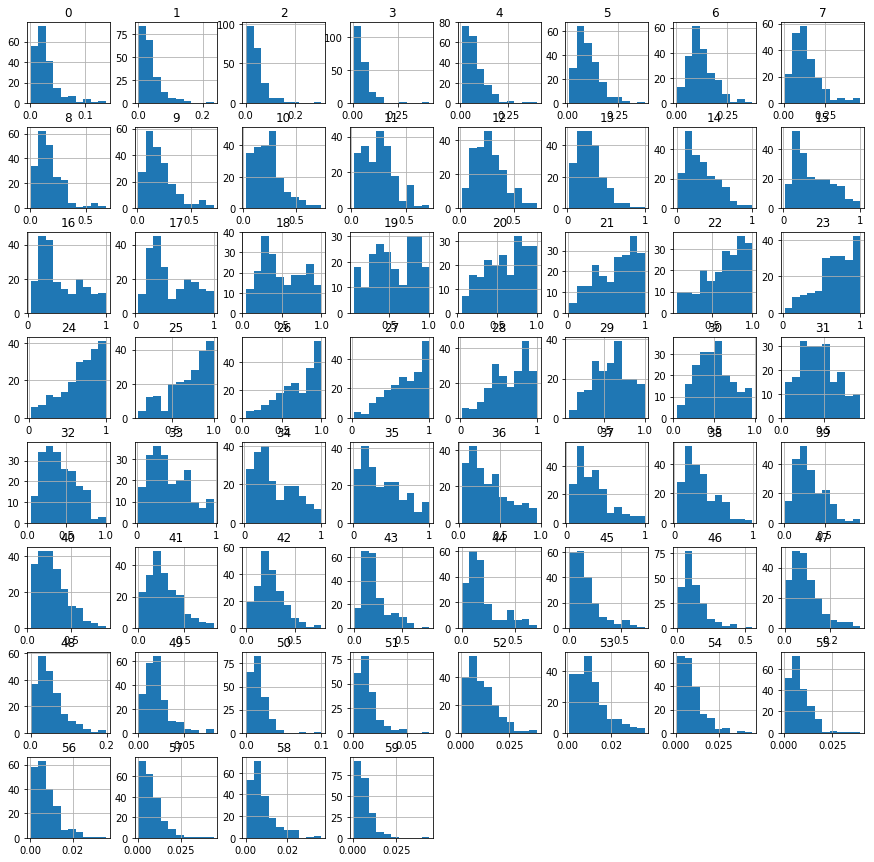

In [6]:
# Histogramas
dados.hist(figsize=(8,8))
plt.show()

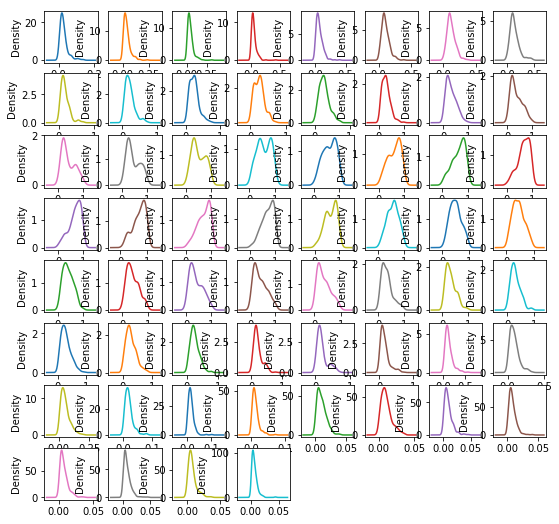

In [22]:
# Density Plots
dados.plot(kind = 'density', subplots = True, layout = (8,8), sharex = False, legend = False,figsize=(9,9))
plt.show()

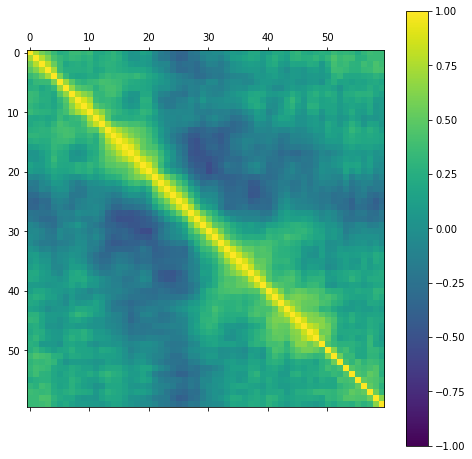

In [20]:
# Matriz de Correlação
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(dados.corr(), vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
plt.show()

## Preparação dos Dados

In [9]:
# Separação em Dados de Treino e Teste
valores_dados = dados.values

# Variáveis independentes
X = valores_dados[:,0:60].astype(float)

# Variável dependente
Y = valores_dados[:,60]

# Conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = cross_validation.train_test_split(X, Y, 
                                                                         test_size = 0.20, 
                                                                         random_state = 7)

print(X_treino.shape)
print(X_teste.shape)

(166, 60)
(42, 60)


## Avaliação do Algoritmo

In [78]:
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Vamos utilizar como métrica a acurácia. Quanto maior o valor, melhor.
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
resultadosNotNorm = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(modelo, X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, 
                                                        scoring = 'accuracy')
    resultadosNotNorm.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.741544 (0.078509)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


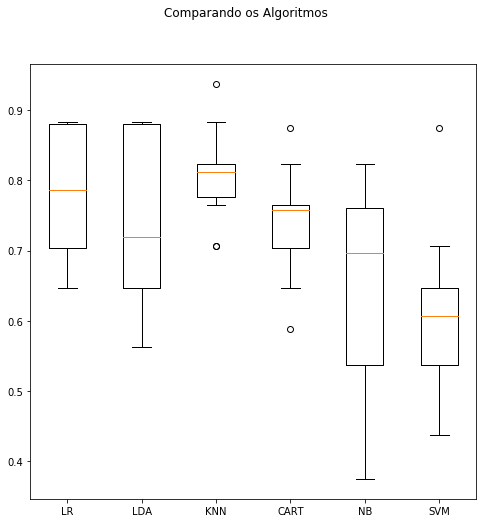

In [79]:
# De acordo com os resultados anteriores, os modelos criados com Regressão Logística e KNN apresentaram 
# os melhores valores de acurácia e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.

fig = plt.figure(figsize=(8,8))
fig.suptitle('Comparando os Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultadosNotNorm)
ax.set_xticklabels(nomes)
plt.show()

### Normalizando os dados (modo 1)

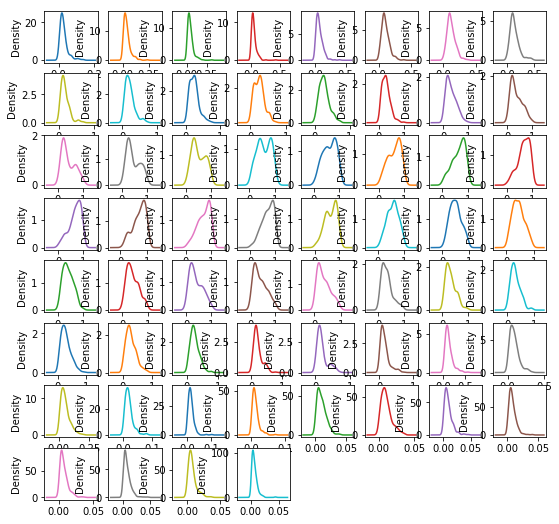

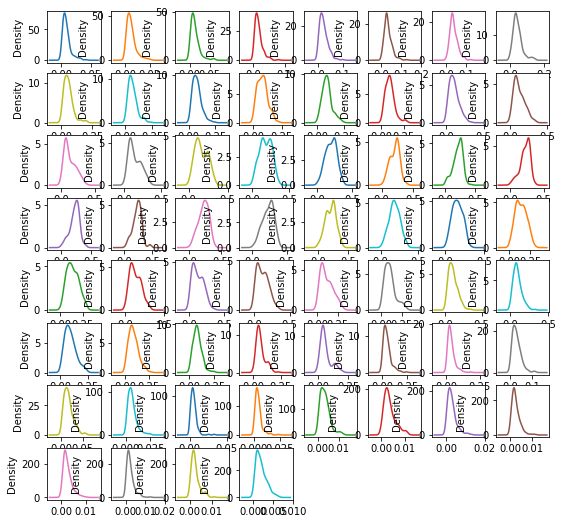

In [67]:
dados_norm = DataFrame(preprocessing.Normalizer().fit_transform(X_treino))

dados.plot(kind = 'density', subplots = True, layout = (8,8), sharex = False, legend = False,figsize=(9,9))
dados_norm.plot(kind = 'density', subplots = True, layout = (8,8), sharex = False, legend = False,figsize=(9,9))
plt.show()

In [75]:
# Os dados estão em diferentes escalas e isso pode estar prejudicando a performance de alguns algoritmos.
# Vamos avaliar novamente os algoritmos, mas agora padronizando os dados (colocando-os na mesma escala).
# Aplicando Padronização ao conjunto de dados
# Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
# desvio padrão igual a 1.
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', preprocessing.StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-LDA', Pipeline([('Scaler', preprocessing.StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', preprocessing.StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', preprocessing.StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', preprocessing.StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', preprocessing.StandardScaler()),('SVM', SVC())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(modelo, 
                                                  X_treino, 
                                                  Y_treino, 
                                                  cv = kfold, 
                                                  scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)
 

Scaled-LR: 0.734191 (0.095885)
Scaled-LDA: 0.746324 (0.117854)
Scaled-KNN: 0.825735 (0.054511)
Scaled-CART: 0.711029 (0.095817)
Scaled-NB: 0.648897 (0.141868)
Scaled-SVM: 0.836397 (0.088697)


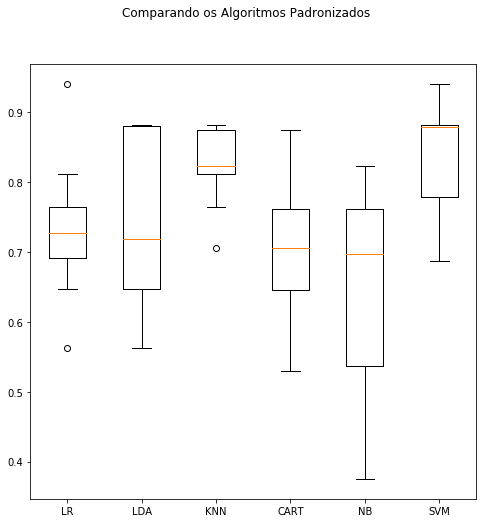

In [83]:
# Nos resultdados anteriores, podemos perceber que a padronização gerou um efeito no modelo criado com algoritmo KNN,
# reduzindo as taxa de erros e também no modelo criado com SVM.
# Comparando os algoritmos
fig = plt.figure(figsize=(8,8))
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
#plt.boxplot(resultadosNotNorm)
ax.set_xticklabels(nomes)
plt.show()

## Tuning dos Modelos criados com KNN e SVM

In [84]:
# Embora o KNN tenha apresentado a menor taxa de erro após a padronização dos dados, podemos ainda otimizá-lo
# com o ajuste dos parâmetros.

# Definindo a escala
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)

# Ajustando valores para o tamanho do K
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
valores_grid = dict(n_neighbors = neighbors)

# Criando o modelo
modelo = KNeighborsClassifier()

# Definindo K
kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)

# Testando diferenets combinações com os valores de K
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = kfold, scoring = 'accuracy')
grid_result = grid.fit(rescaledX, Y_treino)

# Print do resultado
# ***********************
# De acordo com o resultado, o melhor valor de k é 1. Com isso alcançamos uma acurácia de 0.84, o melhor até agora.
# ***********************
print("Melhor Acurácia: %f utilizando %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Melhor Acurácia: 0.849398 utilizando {'n_neighbors': 1}
0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


In [85]:
# Vamos agora ajustar os parâmeros do SVM.

# Definindo a escala
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)

# Ajustando os parâmetros do SVM:
# c_values - indica o nível das margens dos vector machines
# kernel_values - tipos de kernel usados no SVM
# Faremos diferenets combinações desses métodos, a fim de verificar qual é a melhor combinação.
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
valores_grid = dict(C = c_values, kernel = kernel_values)

# Criando o modelo
modelo = SVC()

# Definindo K
kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)

# Testando diferenets combinações com os parâmetros
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = kfold, scoring = 'accuracy')
grid_result = grid.fit(rescaledX, Y_treino)

# Printo do resultado
# ***********************
# De acordo com o resultado, o melhor valor de C é 1.5 com kernel'rbf'. 
# Com isso alcançamos uma acurácia de 0.867, a melhor até agora.
# ***********************
print("Melhor Acurácia: %f utilizando %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Melhor Acurácia: 0.867470 utilizando {'C': 1.5, 'kernel': 'rbf'}
0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.529412 (0.118825) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.680147 (0.098595) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.740074 (0.127908) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.752574 (0.058825) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.758824 (0.096520) with: {'C': 0.9, 'k

## Utilizando Métodos Ensemble

In [86]:
# *************** Dependendo do seu computador esta célula pode levar alguns minutos para ser executada **********

# Métodos Ensemble são outra forma de otimizar o modelo preditivo. Vamos utilizar aqui:
# Metodos Bagging - RandomForest e Extra Trees
# Métodos Boosting - AdaBoost e Gradient Boosting 

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in ensembles:
    kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(modelo, 
                                                        X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, 
                                                        scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

AB: 0.813971 (0.066017)
GBM: 0.854044 (0.099741)
RF: 0.788235 (0.064881)
ET: 0.812132 (0.103013)


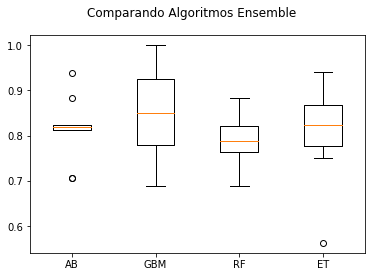

In [87]:
# **** Lembre-se: Cada algoritmo espera receber os dados em um formato/escala específicos e diversas variações ****
# **** no dataset podem ser necessárias até que se consiga o modelo ideal. ****

# Podemos ver que o Gradient Boosting  apresentou a melhor acurácia e portanto a menor taxa de erro.
# Vamos comprovar isso comparando os modelos criados com esses algoritmos
fig = plt.figure()
fig.suptitle('Comparando Algoritmos Ensemble')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Finalizando o Modelo

O modelo criado com SVM apresentou a melhor acurária entre todos os modelos criados e portanto será usado na construção da versão final do modelo preditivo.

In [88]:
# Preparando a versão final do modelo
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)
modelo = SVC(C = 1.5)
modelo.fit(rescaledX, Y_treino)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
# Aplicando o modelo aos dados de teste
rescaledValidationX = scaler.transform(X_teste)
previsoes = modelo.predict(rescaledValidationX)

# A acurácia ficou em 0.857, muito próximo do que conseguimos nos dados de treino
print(accuracy_score(Y_teste, previsoes))
print(confusion_matrix(Y_teste, previsoes))
print(classification_report(Y_teste, previsoes))

0.8571428571428571
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>